In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read data

In [2]:
data = pd.read_csv('MODELLING DATA/model_data.csv')

## Train and test datasets

In [3]:
from sklearn.model_selection import train_test_split

X = data.drop('co2emitted', axis=1)
y = data['co2emitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, shuffle=True)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4751 entries, 6168 to 1289
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type_g             4751 non-null   object 
 1   Generation         4751 non-null   int64  
 2   cf                 4747 non-null   float64
 3   time_coverage      4751 non-null   float64
 4   capacity_p         4714 non-null   float64
 5   capacity_g         4714 non-null   float64
 6   lat                4699 non-null   float64
 7   lon                4699 non-null   float64
 8   country            4714 non-null   object 
 9   status_g           4714 non-null   object 
 10  year_commissioned  3889 non-null   float64
 11  water_type         4714 non-null   object 
 12  cooling_type       3157 non-null   object 
 13  water_withdrawal   3481 non-null   float64
 14  water_consumption  3481 non-null   float64
 15  min_load           4719 non-null   float64
 16  ramp_up            47

## Preprocessor

In [5]:
categorical = X_train.select_dtypes(include=['object']).columns
numeric = X_train.select_dtypes(include=['int64','float64']).columns

In [6]:
categorical

Index(['type_g', 'country', 'status_g', 'water_type', 'cooling_type',
       'best_source'],
      dtype='object')

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Create a list of categorical column names and numeric column names
categorical_columns = list(categorical)
numeric_columns = list(numeric)

# Create transformers for categorical and numeric columns
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])

# Create a column transformer that applies transformers to the respective column types
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ])

# Fit and transform the data
X_train_trans_np = preprocessor.fit_transform(X_train)
X_train_trans = pd.DataFrame(X_train_trans_np, columns=preprocessor.get_feature_names_out())

In [8]:
X_train_trans.to_csv('MODELLING DATA/training_features.csv', index=False)
X_train_trans

,cat__type_g_Biomass,cat__type_g_Fossil Brown coal/Lignite,cat__type_g_Fossil Gas,cat__type_g_Fossil Hard coal,cat__type_g_Fossil Oil,cat__type_g_Fossil Oil shale,cat__type_g_Hydro Pumped Storage,cat__type_g_Hydro Run-of-river and poundage,cat__type_g_Hydro Water Reservoir,cat__type_g_Nuclear,...,num__year_commissioned,num__water_withdrawal,num__water_consumption,num__min_load,num__ramp_up,num__ramp_down,num__minimum_up_time,num__minimum_down_time,num__eff,num__Renewable
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2011.000000,0.010000,0.010000,0.308,0.012,-0.014,152.0,76.0,0.53,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1985.000000,43.006576,0.978957,0.078,0.015,-0.015,60.0,57.0,1.00,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1899.000000,43.070000,0.380000,0.308,0.012,-0.014,152.0,76.0,0.54,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1976.000000,167.870000,1.020000,0.498,0.009,-0.012,1694.0,342.0,1.00,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1973.000000,0.100000,0.100000,0.169,0.009,-0.011,110.0,60.0,0.36,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1997.000000,43.070000,0.380000,0.308,0.012,-0.014,152.0,76.0,0.48,0.0
4747,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1899.000000,0.960000,0.780000,0.383,0.008,-0.008,474.0,112.0,0.23,0.0
4748,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1983.005914,43.070000,0.380000,0.335,0.011,-0.013,77.0,71.0,0.55,0.0
4749,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2007.000000,0.010000,0.010000,0.335,0.011,-0.013,77.0,71.0,0.54,0.0


# Modelling

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

LR = LinearRegression()
ridge = Ridge()
lasso = Lasso()
svm = SVR()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()
boost = GradientBoostingRegressor()

In [10]:
LR.fit(X_train_trans,y_train)
ridge.fit(X_train_trans,y_train)
lasso.fit(X_train_trans,y_train)
svm.fit(X_train_trans,y_train)
tree.fit(X_train_trans,y_train)
forest.fit(X_train_trans,y_train)
boost.fit(X_train_trans,y_train)

c:\Users\danip\Documents\Python venvs\ml_venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.69009e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\danip\Documents\Python venvs\ml_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.647e+20, tolerance: 4.033e+17
  model = cd_fast.enet_coordinate_descent(


GradientBoostingRegressor()

In [11]:
# Fit and transform the data
X_test_trans_np = preprocessor.transform(X_test)
X_test_trans = pd.DataFrame(X_test_trans_np, columns=preprocessor.get_feature_names_out())

In [12]:
models = dict( zip(['linear','ridge','lasso','SVR','Tree','Random forest','Boosting'],
                   [LR,ridge,lasso,svm,tree,forest,boost]) )

print('R^2 coefficient with default parameters:\n')
for model_name in models:
    print(model_name,':',models[model_name].score(X_test_trans,y_test))

R^2 coefficient with default parameters:

linear : 0.8051180287739961
ridge : 0.7992928385702083
lasso : 0.8051181472522058
SVR : -0.26653758887453693
Tree : 0.9888371003202662
Random forest : 0.9963158596999842
Boosting : 0.9943430062456963


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

metrics = dict( zip(['MAE', 'MSE', 'r2', 'exp_variance'],
                    [mean_absolute_error,mean_squared_error,r2_score,explained_variance_score]) )

In [14]:
#Create array of metrics
results = np.zeros([len(models),len(metrics)])

for i,model_name in enumerate(models):
    for j,metric_name in enumerate(metrics):
        metric = metrics[metric_name]
        model = models[model_name]
        results[i,j] = metric(y_test,model.predict(X_test_trans))

scoring = pd.DataFrame(results,columns=metrics.keys(),index=models.keys())
scoring

,MAE,MSE,r2,exp_variance
linear,2.738196e+08,1.844087e+17,0.805118,8.052159e-01
ridge,2.776486e+08,1.899208e+17,0.799293,7.994464e-01
lasso,2.738193e+08,1.844086e+17,0.805118,8.052160e-01
SVR,5.065765e+08,1.198472e+18,-0.266538,2.800824e-07
Tree,2.956936e+07,1.056299e+16,0.988837,9.888576e-01
Random forest,1.872600e+07,3.486148e+15,0.996316,9.963170e-01
Boosting,3.798870e+07,5.352977e+15,0.994343,9.943681e-01


<Axes: >

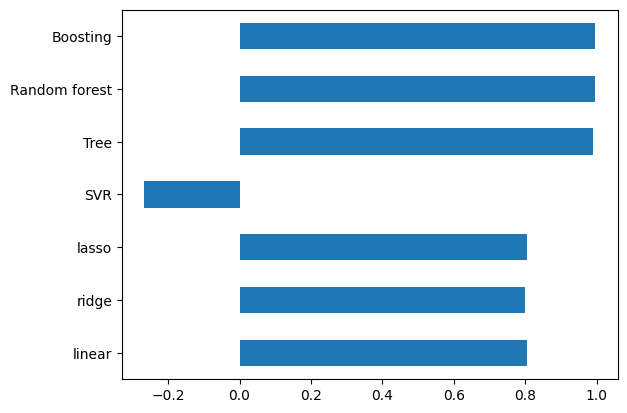

In [15]:
scoring['r2'].plot(kind='barh')

## Use the Decision Tree

Text(0.5, 1.0, 'Feature importances of decision tree model')

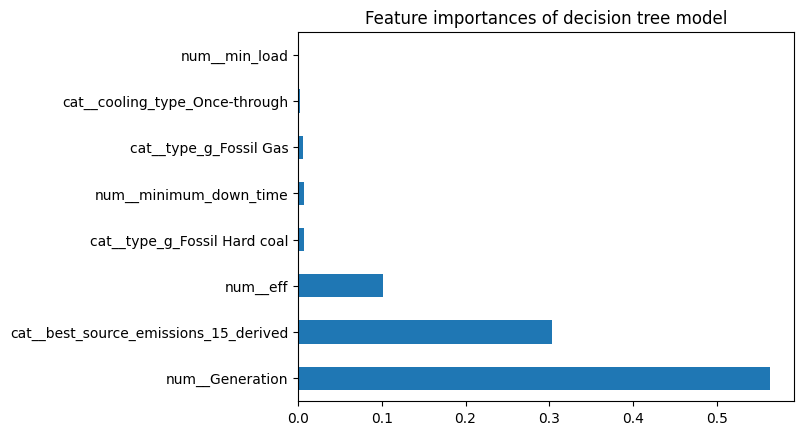

In [17]:
importances = pd.Series(tree.feature_importances_, index=X_train_trans.columns)
importances.sort_values(ascending=False).head(8).plot(kind='barh')
plt.title('Feature importances of decision tree model')

## Save model data

In [24]:
from joblib import dump, load
dump(tree, 'MODELLING DATA/tree_model.joblib')

import pickle
with open('MODELLING DATA/train_test_data.pickle','wb') as file:
    pickle.dump((X_train_trans, X_test_trans, y_train, y_test), file)
with open('MODELLING DATA/preproc_data.pickle','wb') as file:
    pickle.dump((X_train,X_test,categorical,numeric,preprocessor), file)
